## RNN 
- 시계열, 연속형, 매출 등 

# Simple RNN 구축 

### cos 함수로 시계열(Time Series) 만들기 

In [77]:
!pip3 install matplotlib
!pip3 install sklearn

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
np.random.seed(10)
time = np.arange(30 * 12 + 1) 
month = (time % 30) / 30

time_series = 20 * np.where(month < 0.5,
                           np.cos(2 * np.pi * month),
                           np.cos(2 * np.pi * month) + np.random.random(361))

# print(time_series)

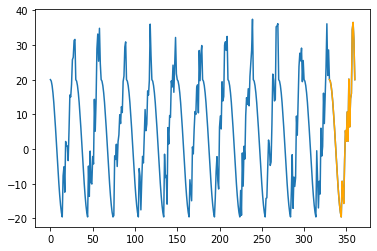

In [18]:
plt.plot(time, time_series)
plt.plot(np.arange(30 * 11, 30 * 12 + 1), time_series[30 * 11:], color = 'orange')

### 데이터 전처리 

In [19]:
def make_sequence(time_series, n):
    X_train = []
    y_train = []
    
    for i in range(len(time_series)):
        x = time_series[i:(i+n)]
        if (i+n) < len(time_series):
            X_train.append(x)
            y_train.append(time_series[i+n])
        else:
            break
            
    return np.array(X_train), np.array(y_train)

In [20]:
n = 10

X_train, y_train = make_sequence(time_series, n)

print(X_train.shape)
print(y_train.shape)

(351, 10)
(351,)


In [21]:
X_train = X_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

### Train, Test Split 

In [22]:
from sklearn.model_selection import train_test_split 

X_train_partial, X_test, y_train_partial, y_test = train_test_split(X_train, y_train, test_size = 0.2)

In [ ]:
print(X_train_partial.shape)
print(y_train_partial.shape)
print(X_test.shape)
print(y_test.shape)

### 데이터 형태 확인하기 

In [58]:
test_arr = np.arange(100)
a, b = make_sequence(test_arr, n)

In [59]:
for i in range(1, 4):
    print(a[i], '|', b[i])

[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13


### Simple RNN 

In [68]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense 
from tensorflow.keras.models import Sequential 

model = Sequential([
    SimpleRNN(32, activation = 'tanh', input_shape = (n,1)),
    Dense(1, activation = 'linear')
])

model.compile(optimizer = 'adam',
             loss = ['mse'],
             metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.fit(X_train_partial, y_train_partial,
         epochs = 200,
         batch_size = 32,
         validation_split = 0.2)

Epoch 1/200
7/7 [==============================] - 0s 26ms/step - loss: 307.3375 - accuracy: 0.0000e+00 - val_loss: 227.1808 - val_accuracy: 0.0000e+00
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 295.5945 - accuracy: 0.0000e+00 - val_loss: 217.5403 - val_accuracy: 0.0000e+00
Epoch 3/200
7/7 [==============================] - 0s 4ms/step - loss: 284.0891 - accuracy: 0.0000e+00 - val_loss: 208.2742 - val_accuracy: 0.0000e+00
Epoch 4/200
7/7 [==============================] - 0s 4ms/step - loss: 273.0340 - accuracy: 0.0000e+00 - val_loss: 199.1674 - val_accuracy: 0.0000e+00
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 262.4056 - accuracy: 0.0000e+00 - val_loss: 190.2433 - val_accuracy: 0.0000e+00
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 251.3673 - accuracy: 0.0000e+00 - val_loss: 181.9270 - val_accuracy: 0.0000e+00
Epoch 7/200
7/7 [==============================] - 0s 4ms/step - loss: 241.3097 - accuracy: 0

7/7 [==============================] - 0s 5ms/step - loss: 39.4424 - accuracy: 0.0000e+00 - val_loss: 34.2577 - val_accuracy: 0.0000e+00
Epoch 110/200
7/7 [==============================] - 0s 5ms/step - loss: 39.2248 - accuracy: 0.0000e+00 - val_loss: 34.3309 - val_accuracy: 0.0000e+00
Epoch 111/200
7/7 [==============================] - 0s 5ms/step - loss: 38.9195 - accuracy: 0.0000e+00 - val_loss: 33.8821 - val_accuracy: 0.0000e+00
Epoch 112/200
7/7 [==============================] - 0s 5ms/step - loss: 38.6616 - accuracy: 0.0000e+00 - val_loss: 34.1839 - val_accuracy: 0.0000e+00
Epoch 113/200
7/7 [==============================] - 0s 4ms/step - loss: 38.4011 - accuracy: 0.0000e+00 - val_loss: 33.9035 - val_accuracy: 0.0000e+00
Epoch 114/200
7/7 [==============================] - 0s 5ms/step - loss: 38.0839 - accuracy: 0.0000e+00 - val_loss: 33.8149 - val_accuracy: 0.0000e+00
Epoch 115/200
7/7 [==============================] - 0s 4ms/step - loss: 37.8945 - accuracy: 0.0000e+00 - va

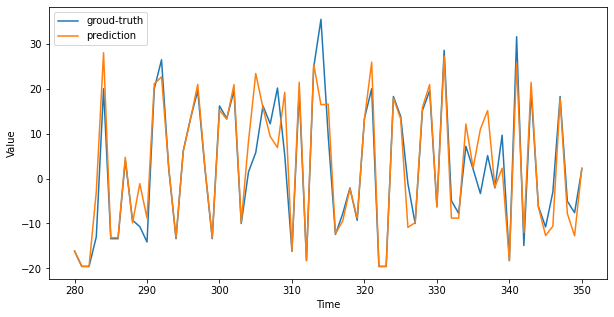

In [66]:
pred = model.predict(X_test)
pred_range = np.arange(len(y_train_partial), len(y_train_partial) + len(pred))

plt.figure(figsize = (10, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), label = 'groud-truth')
plt.plot(pred_range, pred, label='prediction')
plt.legend()

### LSTM 

In [69]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, LSTM
from tensorflow.keras.models import Sequential 

n = 10

model_LSTM = Sequential([
    LSTM(32, 
         return_sequences = False, 
#          return_sequences = True, # 적층 구조 
         input_shape = (n , 1)),
    Dense(1, activation = 'linear')
])

model_LSTM.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mse'])

model_LSTM.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [70]:
model_LSTM.fit(X_train_partial, y_train_partial,
         epochs = 500,
         batch_size = 64,
         validation_split = 0.2)

Epoch 1/500
4/4 [==============================] - 0s 108ms/step - loss: 258.1091 - mse: 258.1091 - val_loss: 330.7935 - val_mse: 330.7935
Epoch 2/500
4/4 [==============================] - 0s 10ms/step - loss: 253.0245 - mse: 253.0245 - val_loss: 324.6864 - val_mse: 324.6864
Epoch 3/500
4/4 [==============================] - 0s 10ms/step - loss: 247.8876 - mse: 247.8876 - val_loss: 318.7471 - val_mse: 318.7471
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 242.9569 - mse: 242.9569 - val_loss: 313.0015 - val_mse: 313.0015
Epoch 5/500
4/4 [==============================] - 0s 11ms/step - loss: 238.3278 - mse: 238.3278 - val_loss: 307.5320 - val_mse: 307.5320
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 233.9544 - mse: 233.9544 - val_loss: 302.3026 - val_mse: 302.3026
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 229.6643 - mse: 229.6643 - val_loss: 297.2636 - val_mse: 297.2636
Epoch 8/500
4/4 [==================

4/4 [==============================] - 0s 8ms/step - loss: 79.3354 - mse: 79.3354 - val_loss: 111.9406 - val_mse: 111.9406
Epoch 61/500
4/4 [==============================] - 0s 9ms/step - loss: 77.8952 - mse: 77.8952 - val_loss: 110.0342 - val_mse: 110.0342
Epoch 62/500
4/4 [==============================] - 0s 8ms/step - loss: 76.5514 - mse: 76.5514 - val_loss: 108.4173 - val_mse: 108.4173
Epoch 63/500
4/4 [==============================] - 0s 10ms/step - loss: 75.3628 - mse: 75.3628 - val_loss: 106.6673 - val_mse: 106.6673
Epoch 64/500
4/4 [==============================] - 0s 10ms/step - loss: 73.9144 - mse: 73.9144 - val_loss: 104.7199 - val_mse: 104.7199
Epoch 65/500
4/4 [==============================] - 0s 8ms/step - loss: 72.6890 - mse: 72.6890 - val_loss: 103.1488 - val_mse: 103.1488
Epoch 66/500
4/4 [==============================] - 0s 8ms/step - loss: 71.4960 - mse: 71.4960 - val_loss: 101.8014 - val_mse: 101.8014
Epoch 67/500
4/4 [==============================] - 0s 8ms/

Epoch 121/500
4/4 [==============================] - 0s 8ms/step - loss: 39.6118 - mse: 39.6118 - val_loss: 58.3467 - val_mse: 58.3467
Epoch 122/500
4/4 [==============================] - 0s 8ms/step - loss: 38.9653 - mse: 38.9653 - val_loss: 57.9326 - val_mse: 57.9326
Epoch 123/500
4/4 [==============================] - 0s 8ms/step - loss: 38.5955 - mse: 38.5955 - val_loss: 57.4506 - val_mse: 57.4506
Epoch 124/500
4/4 [==============================] - 0s 8ms/step - loss: 38.1418 - mse: 38.1418 - val_loss: 56.6924 - val_mse: 56.6924
Epoch 125/500
4/4 [==============================] - 0s 8ms/step - loss: 37.5966 - mse: 37.5966 - val_loss: 56.1231 - val_mse: 56.1231
Epoch 126/500
4/4 [==============================] - 0s 8ms/step - loss: 37.2501 - mse: 37.2501 - val_loss: 55.7411 - val_mse: 55.7411
Epoch 127/500
4/4 [==============================] - 0s 9ms/step - loss: 36.7455 - mse: 36.7455 - val_loss: 55.5350 - val_mse: 55.5350
Epoch 128/500
4/4 [==============================] - 0s

4/4 [==============================] - 0s 11ms/step - loss: 22.5666 - mse: 22.5666 - val_loss: 40.5316 - val_mse: 40.5316
Epoch 182/500
4/4 [==============================] - 0s 10ms/step - loss: 22.7666 - mse: 22.7666 - val_loss: 40.3789 - val_mse: 40.3789
Epoch 183/500
4/4 [==============================] - 0s 10ms/step - loss: 22.3068 - mse: 22.3068 - val_loss: 40.9929 - val_mse: 40.9929
Epoch 184/500
4/4 [==============================] - 0s 10ms/step - loss: 22.2320 - mse: 22.2320 - val_loss: 41.1959 - val_mse: 41.1959
Epoch 185/500
4/4 [==============================] - 0s 11ms/step - loss: 22.1139 - mse: 22.1139 - val_loss: 40.8728 - val_mse: 40.8728
Epoch 186/500
4/4 [==============================] - 0s 9ms/step - loss: 21.9489 - mse: 21.9489 - val_loss: 40.5438 - val_mse: 40.5438
Epoch 187/500
4/4 [==============================] - 0s 11ms/step - loss: 21.7119 - mse: 21.7119 - val_loss: 40.6069 - val_mse: 40.6069
Epoch 188/500
4/4 [==============================] - 0s 8ms/ste

Epoch 242/500
4/4 [==============================] - 0s 9ms/step - loss: 15.1783 - mse: 15.1783 - val_loss: 35.0747 - val_mse: 35.0747
Epoch 243/500
4/4 [==============================] - 0s 9ms/step - loss: 15.1506 - mse: 15.1506 - val_loss: 35.6347 - val_mse: 35.6347
Epoch 244/500
4/4 [==============================] - 0s 9ms/step - loss: 15.0278 - mse: 15.0278 - val_loss: 36.1684 - val_mse: 36.1684
Epoch 245/500
4/4 [==============================] - 0s 8ms/step - loss: 15.2740 - mse: 15.2740 - val_loss: 35.3479 - val_mse: 35.3479
Epoch 246/500
4/4 [==============================] - 0s 8ms/step - loss: 14.9107 - mse: 14.9107 - val_loss: 35.3448 - val_mse: 35.3448
Epoch 247/500
4/4 [==============================] - 0s 8ms/step - loss: 14.9735 - mse: 14.9735 - val_loss: 34.8159 - val_mse: 34.8159
Epoch 248/500
4/4 [==============================] - ETA: 0s - loss: 16.1100 - mse: 16.110 - 0s 7ms/step - loss: 14.8901 - mse: 14.8901 - val_loss: 34.8177 - val_mse: 34.8177
Epoch 249/500
4

4/4 [==============================] - 0s 12ms/step - loss: 12.6245 - mse: 12.6245 - val_loss: 35.1471 - val_mse: 35.1471
Epoch 303/500
4/4 [==============================] - 0s 12ms/step - loss: 12.5562 - mse: 12.5562 - val_loss: 35.3583 - val_mse: 35.3583
Epoch 304/500
4/4 [==============================] - 0s 11ms/step - loss: 12.7100 - mse: 12.7100 - val_loss: 35.3759 - val_mse: 35.3759
Epoch 305/500
4/4 [==============================] - 0s 10ms/step - loss: 12.9163 - mse: 12.9163 - val_loss: 34.9252 - val_mse: 34.9252
Epoch 306/500
4/4 [==============================] - 0s 10ms/step - loss: 12.6428 - mse: 12.6428 - val_loss: 35.0912 - val_mse: 35.0912
Epoch 307/500
4/4 [==============================] - 0s 9ms/step - loss: 12.5586 - mse: 12.5586 - val_loss: 35.6883 - val_mse: 35.6883
Epoch 308/500
4/4 [==============================] - 0s 9ms/step - loss: 12.9496 - mse: 12.9496 - val_loss: 34.3902 - val_mse: 34.3902
Epoch 309/500
4/4 [==============================] - 0s 9ms/step

4/4 [==============================] - 0s 8ms/step - loss: 11.9171 - mse: 11.9171 - val_loss: 34.5568 - val_mse: 34.5568
Epoch 363/500
4/4 [==============================] - 0s 7ms/step - loss: 11.1125 - mse: 11.1125 - val_loss: 34.0813 - val_mse: 34.0813
Epoch 364/500
4/4 [==============================] - 0s 7ms/step - loss: 11.6784 - mse: 11.6784 - val_loss: 33.8667 - val_mse: 33.8667
Epoch 365/500
4/4 [==============================] - 0s 7ms/step - loss: 11.6017 - mse: 11.6017 - val_loss: 33.6925 - val_mse: 33.6925
Epoch 366/500
4/4 [==============================] - 0s 8ms/step - loss: 11.3176 - mse: 11.3176 - val_loss: 35.0003 - val_mse: 35.0003
Epoch 367/500
4/4 [==============================] - 0s 7ms/step - loss: 11.5306 - mse: 11.5306 - val_loss: 34.3654 - val_mse: 34.3654
Epoch 368/500
4/4 [==============================] - 0s 7ms/step - loss: 11.2469 - mse: 11.2469 - val_loss: 34.0258 - val_mse: 34.0258
Epoch 369/500
4/4 [==============================] - 0s 8ms/step - lo

Epoch 423/500
4/4 [==============================] - 0s 7ms/step - loss: 10.4850 - mse: 10.4850 - val_loss: 35.4892 - val_mse: 35.4892
Epoch 424/500
4/4 [==============================] - 0s 7ms/step - loss: 10.3985 - mse: 10.3985 - val_loss: 35.8930 - val_mse: 35.8930
Epoch 425/500
4/4 [==============================] - 0s 7ms/step - loss: 10.5370 - mse: 10.5370 - val_loss: 35.6387 - val_mse: 35.6387
Epoch 426/500
4/4 [==============================] - 0s 7ms/step - loss: 10.4001 - mse: 10.4001 - val_loss: 35.4478 - val_mse: 35.4478
Epoch 427/500
4/4 [==============================] - 0s 7ms/step - loss: 10.4771 - mse: 10.4771 - val_loss: 35.5898 - val_mse: 35.5898
Epoch 428/500
4/4 [==============================] - 0s 7ms/step - loss: 10.3325 - mse: 10.3325 - val_loss: 35.8816 - val_mse: 35.8816
Epoch 429/500
4/4 [==============================] - 0s 7ms/step - loss: 10.4892 - mse: 10.4892 - val_loss: 35.8201 - val_mse: 35.8201
Epoch 430/500
4/4 [==============================] - 0s

Epoch 484/500
4/4 [==============================] - 0s 7ms/step - loss: 9.9207 - mse: 9.9207 - val_loss: 36.6639 - val_mse: 36.6639
Epoch 485/500
4/4 [==============================] - 0s 7ms/step - loss: 10.0197 - mse: 10.0197 - val_loss: 37.2341 - val_mse: 37.2341
Epoch 486/500
4/4 [==============================] - 0s 7ms/step - loss: 9.9077 - mse: 9.9077 - val_loss: 36.1902 - val_mse: 36.1902
Epoch 487/500
4/4 [==============================] - 0s 8ms/step - loss: 10.0490 - mse: 10.0490 - val_loss: 36.3200 - val_mse: 36.3200
Epoch 488/500
4/4 [==============================] - 0s 8ms/step - loss: 9.8483 - mse: 9.8483 - val_loss: 37.8966 - val_mse: 37.8966
Epoch 489/500
4/4 [==============================] - 0s 7ms/step - loss: 10.3578 - mse: 10.3578 - val_loss: 36.7063 - val_mse: 36.7063
Epoch 490/500
4/4 [==============================] - 0s 7ms/step - loss: 10.0779 - mse: 10.0779 - val_loss: 35.2867 - val_mse: 35.2867
Epoch 491/500
4/4 [==============================] - 0s 7ms/s

In [78]:
model_LSTM.evaluate(X_test, y_test, verbose = 2)

3/3 - 0s - loss: 31.3944 - mse: 31.3944


[31.39444923400879, 31.39444923400879]

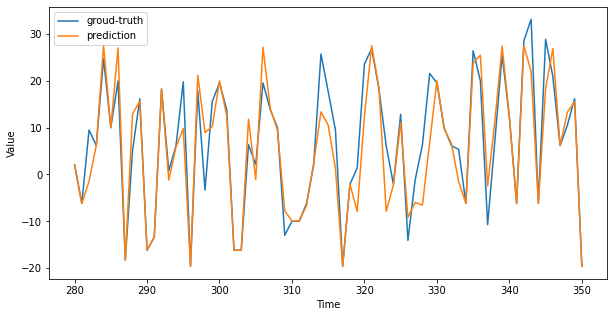

In [79]:
pred = model_LSTM.predict(X_test)
pred_range = np.arange(len(y_train_partial), len(y_train_partial) + len(pred))

plt.figure(figsize = (10, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), label = 'groud-truth')
plt.plot(pred_range, pred, label='prediction')
plt.legend()

### GRU

In [80]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, LSTM
from tensorflow.keras.models import Sequential 

n = 10

model_GRU = Sequential([
    LSTM(32, 
         return_sequences = False, 
#          return_sequences = True, # 적층 구조 
         input_shape = (n , 1)),
    Dense(1, activation = 'linear')
])

model_GRU.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mse'])

model_GRU.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [81]:
model_GRU.fit(X_train_partial, y_train_partial,
         epochs = 500,
         batch_size = 64,
         validation_split = 0.2)

Epoch 1/500
4/4 [==============================] - 0s 88ms/step - loss: 215.4490 - mse: 215.4490 - val_loss: 279.7197 - val_mse: 279.7197
Epoch 2/500
4/4 [==============================] - 0s 11ms/step - loss: 211.8807 - mse: 211.8807 - val_loss: 275.3311 - val_mse: 275.3311
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 208.2416 - mse: 208.2416 - val_loss: 270.9117 - val_mse: 270.9117
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 204.6118 - mse: 204.6118 - val_loss: 266.4584 - val_mse: 266.4584
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 200.8888 - mse: 200.8888 - val_loss: 262.1083 - val_mse: 262.1083
Epoch 6/500
4/4 [==============================] - 0s 10ms/step - loss: 197.3884 - mse: 197.3884 - val_loss: 257.8832 - val_mse: 257.8832
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 193.9376 - mse: 193.9376 - val_loss: 253.7537 - val_mse: 253.7537
Epoch 8/500
4/4 [===================

4/4 [==============================] - 0s 8ms/step - loss: 69.8026 - mse: 69.8026 - val_loss: 99.6471 - val_mse: 99.6471
Epoch 61/500
4/4 [==============================] - 0s 8ms/step - loss: 68.6859 - mse: 68.6859 - val_loss: 98.0694 - val_mse: 98.0694
Epoch 62/500
4/4 [==============================] - 0s 8ms/step - loss: 67.5472 - mse: 67.5472 - val_loss: 96.5588 - val_mse: 96.5588
Epoch 63/500
4/4 [==============================] - 0s 7ms/step - loss: 66.4597 - mse: 66.4597 - val_loss: 95.1099 - val_mse: 95.1099
Epoch 64/500
4/4 [==============================] - 0s 8ms/step - loss: 65.3383 - mse: 65.3383 - val_loss: 93.7283 - val_mse: 93.7283
Epoch 65/500
4/4 [==============================] - 0s 8ms/step - loss: 64.4602 - mse: 64.4602 - val_loss: 92.3352 - val_mse: 92.3352
Epoch 66/500
4/4 [==============================] - 0s 8ms/step - loss: 63.3596 - mse: 63.3596 - val_loss: 91.1595 - val_mse: 91.1595
Epoch 67/500
4/4 [==============================] - 0s 9ms/step - loss: 62.

4/4 [==============================] - 0s 9ms/step - loss: 33.4173 - mse: 33.4173 - val_loss: 53.0493 - val_mse: 53.0493
Epoch 122/500
4/4 [==============================] - 0s 9ms/step - loss: 33.0866 - mse: 33.0866 - val_loss: 52.3831 - val_mse: 52.3831
Epoch 123/500
4/4 [==============================] - 0s 8ms/step - loss: 32.6044 - mse: 32.6044 - val_loss: 52.1998 - val_mse: 52.1998
Epoch 124/500
4/4 [==============================] - 0s 8ms/step - loss: 32.2475 - mse: 32.2475 - val_loss: 51.7814 - val_mse: 51.7814
Epoch 125/500
4/4 [==============================] - 0s 8ms/step - loss: 31.9830 - mse: 31.9830 - val_loss: 51.4664 - val_mse: 51.4664
Epoch 126/500
4/4 [==============================] - 0s 7ms/step - loss: 31.7119 - mse: 31.7119 - val_loss: 50.8324 - val_mse: 50.8324
Epoch 127/500
4/4 [==============================] - 0s 8ms/step - loss: 31.3974 - mse: 31.3974 - val_loss: 50.5808 - val_mse: 50.5808
Epoch 128/500
4/4 [==============================] - 0s 9ms/step - lo

Epoch 182/500
4/4 [==============================] - 0s 8ms/step - loss: 21.1370 - mse: 21.1370 - val_loss: 38.8778 - val_mse: 38.8778
Epoch 183/500
4/4 [==============================] - 0s 7ms/step - loss: 21.2205 - mse: 21.2205 - val_loss: 38.8737 - val_mse: 38.8737
Epoch 184/500
4/4 [==============================] - 0s 7ms/step - loss: 20.8209 - mse: 20.8209 - val_loss: 39.0718 - val_mse: 39.0718
Epoch 185/500
4/4 [==============================] - 0s 7ms/step - loss: 20.8334 - mse: 20.8334 - val_loss: 38.6308 - val_mse: 38.6308
Epoch 186/500
4/4 [==============================] - 0s 8ms/step - loss: 20.7265 - mse: 20.7265 - val_loss: 38.4329 - val_mse: 38.4329
Epoch 187/500
4/4 [==============================] - 0s 7ms/step - loss: 20.5281 - mse: 20.5281 - val_loss: 38.2436 - val_mse: 38.2436
Epoch 188/500
4/4 [==============================] - 0s 8ms/step - loss: 20.4539 - mse: 20.4539 - val_loss: 38.2041 - val_mse: 38.2041
Epoch 189/500
4/4 [==============================] - 0s

Epoch 243/500
4/4 [==============================] - 0s 14ms/step - loss: 15.6074 - mse: 15.6074 - val_loss: 33.1841 - val_mse: 33.1841
Epoch 244/500
4/4 [==============================] - 0s 11ms/step - loss: 15.5975 - mse: 15.5975 - val_loss: 33.1501 - val_mse: 33.1501
Epoch 245/500
4/4 [==============================] - 0s 12ms/step - loss: 15.4968 - mse: 15.4968 - val_loss: 33.0433 - val_mse: 33.0433
Epoch 246/500
4/4 [==============================] - 0s 12ms/step - loss: 15.3949 - mse: 15.3949 - val_loss: 33.2023 - val_mse: 33.2023
Epoch 247/500
4/4 [==============================] - 0s 9ms/step - loss: 15.3413 - mse: 15.3413 - val_loss: 33.2204 - val_mse: 33.2204
Epoch 248/500
4/4 [==============================] - 0s 8ms/step - loss: 15.3113 - mse: 15.3113 - val_loss: 32.5843 - val_mse: 32.5843
Epoch 249/500
4/4 [==============================] - 0s 8ms/step - loss: 15.3132 - mse: 15.3132 - val_loss: 33.0436 - val_mse: 33.0436
Epoch 250/500
4/4 [==============================] 

4/4 [==============================] - 0s 10ms/step - loss: 11.9999 - mse: 11.9999 - val_loss: 29.8751 - val_mse: 29.8751
Epoch 304/500
4/4 [==============================] - 0s 9ms/step - loss: 11.9592 - mse: 11.9592 - val_loss: 29.9207 - val_mse: 29.9207
Epoch 305/500
4/4 [==============================] - 0s 10ms/step - loss: 11.8949 - mse: 11.8949 - val_loss: 30.3027 - val_mse: 30.3027
Epoch 306/500
4/4 [==============================] - 0s 10ms/step - loss: 11.8739 - mse: 11.8739 - val_loss: 30.6752 - val_mse: 30.6752
Epoch 307/500
4/4 [==============================] - 0s 11ms/step - loss: 11.8780 - mse: 11.8780 - val_loss: 31.0724 - val_mse: 31.0724
Epoch 308/500
4/4 [==============================] - 0s 11ms/step - loss: 11.8692 - mse: 11.8692 - val_loss: 30.3365 - val_mse: 30.3365
Epoch 309/500
4/4 [==============================] - 0s 9ms/step - loss: 11.7153 - mse: 11.7153 - val_loss: 30.3807 - val_mse: 30.3807
Epoch 310/500
4/4 [==============================] - 0s 9ms/step

Epoch 364/500
4/4 [==============================] - 0s 10ms/step - loss: 9.5390 - mse: 9.5390 - val_loss: 29.2286 - val_mse: 29.2286
Epoch 365/500
4/4 [==============================] - 0s 8ms/step - loss: 9.4630 - mse: 9.4630 - val_loss: 29.7530 - val_mse: 29.7530
Epoch 366/500
4/4 [==============================] - 0s 8ms/step - loss: 9.4420 - mse: 9.4420 - val_loss: 30.0989 - val_mse: 30.0989
Epoch 367/500
4/4 [==============================] - 0s 8ms/step - loss: 9.4247 - mse: 9.4247 - val_loss: 30.0369 - val_mse: 30.0369
Epoch 368/500
4/4 [==============================] - 0s 8ms/step - loss: 9.3872 - mse: 9.3872 - val_loss: 30.0918 - val_mse: 30.0918
Epoch 369/500
4/4 [==============================] - 0s 8ms/step - loss: 9.3740 - mse: 9.3740 - val_loss: 29.8538 - val_mse: 29.8538
Epoch 370/500
4/4 [==============================] - 0s 10ms/step - loss: 9.4080 - mse: 9.4080 - val_loss: 29.9613 - val_mse: 29.9613
Epoch 371/500
4/4 [==============================] - 0s 10ms/step -

4/4 [==============================] - 0s 15ms/step - loss: 7.9874 - mse: 7.9874 - val_loss: 31.0672 - val_mse: 31.0672
Epoch 426/500
4/4 [==============================] - 0s 9ms/step - loss: 7.9616 - mse: 7.9616 - val_loss: 31.1520 - val_mse: 31.1520
Epoch 427/500
4/4 [==============================] - 0s 9ms/step - loss: 7.9160 - mse: 7.9160 - val_loss: 30.7323 - val_mse: 30.7323
Epoch 428/500
4/4 [==============================] - 0s 10ms/step - loss: 7.9000 - mse: 7.9000 - val_loss: 30.8793 - val_mse: 30.8793
Epoch 429/500
4/4 [==============================] - 0s 8ms/step - loss: 7.8559 - mse: 7.8559 - val_loss: 30.9658 - val_mse: 30.9658
Epoch 430/500
4/4 [==============================] - 0s 9ms/step - loss: 7.8563 - mse: 7.8563 - val_loss: 31.2584 - val_mse: 31.2584
Epoch 431/500
4/4 [==============================] - 0s 11ms/step - loss: 7.8455 - mse: 7.8455 - val_loss: 31.4612 - val_mse: 31.4612
Epoch 432/500
4/4 [==============================] - 0s 10ms/step - loss: 7.7930

4/4 [==============================] - 0s 9ms/step - loss: 7.0003 - mse: 7.0003 - val_loss: 32.3190 - val_mse: 32.3190
Epoch 487/500
4/4 [==============================] - 0s 8ms/step - loss: 7.0109 - mse: 7.0109 - val_loss: 32.5006 - val_mse: 32.5006
Epoch 488/500
4/4 [==============================] - 0s 8ms/step - loss: 6.9485 - mse: 6.9485 - val_loss: 32.6455 - val_mse: 32.6455
Epoch 489/500
4/4 [==============================] - 0s 8ms/step - loss: 6.9558 - mse: 6.9558 - val_loss: 32.8139 - val_mse: 32.8139
Epoch 490/500
4/4 [==============================] - 0s 9ms/step - loss: 6.9421 - mse: 6.9421 - val_loss: 32.6870 - val_mse: 32.6870
Epoch 491/500
4/4 [==============================] - 0s 9ms/step - loss: 6.9410 - mse: 6.9410 - val_loss: 32.7842 - val_mse: 32.7842
Epoch 492/500
4/4 [==============================] - 0s 13ms/step - loss: 6.9282 - mse: 6.9282 - val_loss: 32.8691 - val_mse: 32.8691
Epoch 493/500
4/4 [==============================] - 0s 19ms/step - loss: 6.9162 -

In [82]:
model_GRU.evaluate(X_test, y_test, verbose = 2)

3/3 - 0s - loss: 41.9392 - mse: 41.9392


[41.9391975402832, 41.9391975402832]

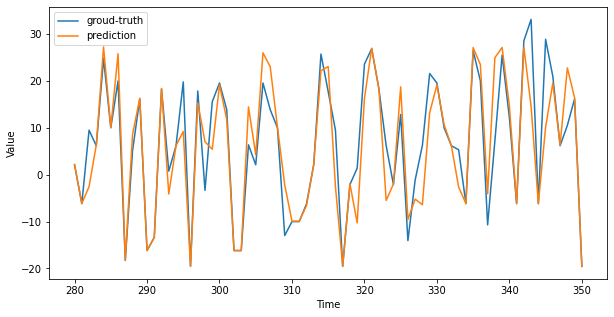

In [83]:
pred = model_GRU.predict(X_test)
pred_range = np.arange(len(y_train_partial), len(y_train_partial) + len(pred))

plt.figure(figsize = (10, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), label = 'groud-truth')
plt.plot(pred_range, pred, label='prediction')
plt.legend()

### Text Word-Vectors 